In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [38]:
# Especifica los nombres de las columnas, colocando lo que estan en la especificacion del dataset
column_names = ['ID', 'Diagnosis', 'radius1','texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1',
                'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2',
                'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3',
                'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3'] 
cancer_data=pd.read_csv("data/wdbc.data",names=column_names)

In [39]:
cancer_data

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [40]:
# Contar el número de filas donde la columna tiene el valor 'M'
contador = (cancer_data['Diagnosis'] == 'M').sum()
print("Número de filas donde la columna tiene el valor 'M':", contador)

Número de filas donde la columna tiene el valor 'M': 212


In [41]:
# Contar el número de filas donde la columna tiene el valor 'M'
contador = (cancer_data['Diagnosis'] == 'B').sum()
print("Número de filas donde la columna tiene el valor 'B':", contador)

Número de filas donde la columna tiene el valor 'B': 357


In [42]:
#buscamos blancos
cancer_data.fillna

<bound method NDFrame.fillna of            ID Diagnosis  radius1  texture1  perimeter1   area1  smoothness1  \
0      842302         M    17.99     10.38      122.80  1001.0      0.11840   
1      842517         M    20.57     17.77      132.90  1326.0      0.08474   
2    84300903         M    19.69     21.25      130.00  1203.0      0.10960   
3    84348301         M    11.42     20.38       77.58   386.1      0.14250   
4    84358402         M    20.29     14.34      135.10  1297.0      0.10030   
..        ...       ...      ...       ...         ...     ...          ...   
564    926424         M    21.56     22.39      142.00  1479.0      0.11100   
565    926682         M    20.13     28.25      131.20  1261.0      0.09780   
566    926954         M    16.60     28.08      108.30   858.1      0.08455   
567    927241         M    20.60     29.33      140.10  1265.0      0.11780   
568     92751         B     7.76     24.54       47.92   181.0      0.05263   

     compactness1  

In [43]:
#buscamos nulos
valores_nulos = cancer_data.isnull()

In [44]:
# Eliminar la columna 'ID'
cancer_data = cancer_data.drop('ID', axis=1)

In [45]:
columns_to_convert = cancer_data.columns.difference(['Diagnosis'])

In [46]:
# Convertir las columnas seleccionadas a flotante
cancer_data[columns_to_convert] = cancer_data[columns_to_convert].astype(float)

In [47]:
cancer_data_LR = cancer_data
cancer_data_AD = cancer_data

In [48]:
# Dividir el conjunto de datos en características (X) y etiquetas (y)
X = cancer_data.drop('Diagnosis', axis=1)  # Elimina la columna objetivo para obtener características
y = cancer_data['Diagnosis']               # La columna objetivo se convierte en etiquetas

In [49]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Imprimir los tamaños de los conjuntos de datos resultantes
print("Tamaño del conjunto de entrenamiento:", X_train.shape[0])
print("Tamaño del conjunto de prueba:", X_test.shape[0])

Tamaño del conjunto de entrenamiento: 455
Tamaño del conjunto de prueba: 114


In [51]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [52]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [53]:
# Evaluar el modelo
y_pred = clf.predict(X_test)

In [54]:
conf_matrix = confusion_matrix(y_test, y_pred)

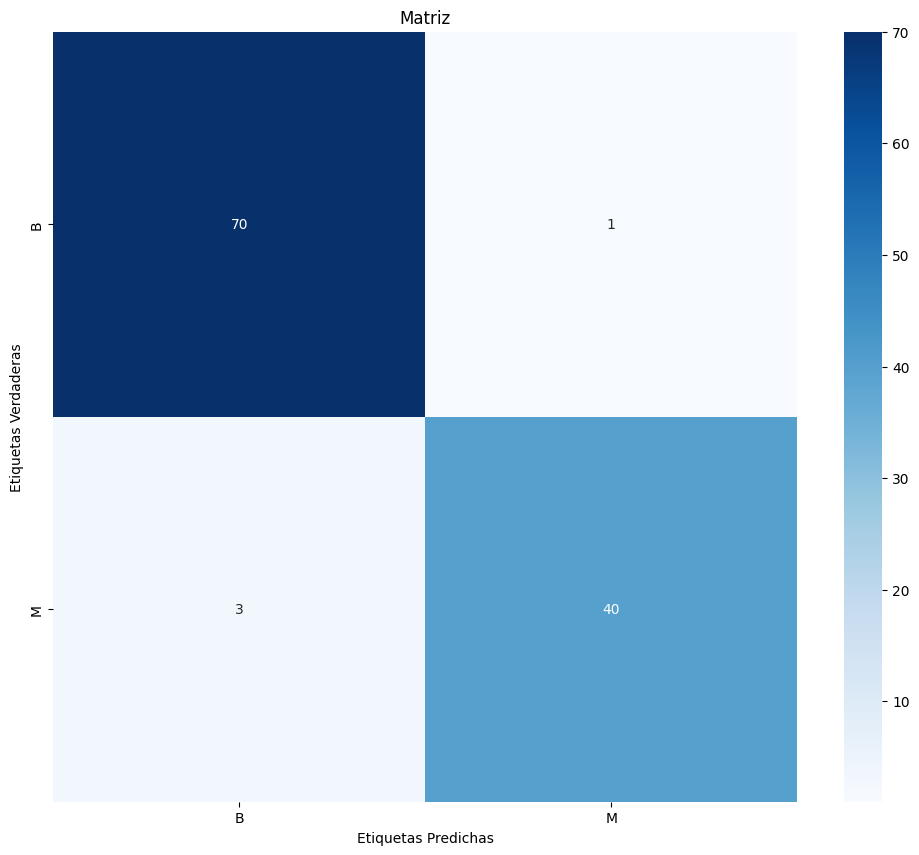

In [55]:
#Visualización
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Matriz')
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.show()

In [56]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')

Precisión del modelo: 96.49%


In [57]:
#Metodo 2, regresion lineal cancer_data_LR
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [58]:
X = cancer_data_LR.drop("Diagnosis", axis=1)
y = cancer_data_LR["Diagnosis"]

In [59]:
#Dividimos el dataset en test y training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [60]:
# Imprimir los tamaños de los conjuntos de datos resultantes
print("Tamaño del conjunto de entrenamiento:", X_train.shape[0])
print("Tamaño del conjunto de prueba:", X_test.shape[0])

Tamaño del conjunto de entrenamiento: 455
Tamaño del conjunto de prueba: 114


In [61]:
# Entrenar el modelo de regresión logística
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

c:\Users\Santi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
# Predecir las etiquetas para el conjunto de prueba
y_pred = modelo.predict(X_test)

In [63]:
conf_matrix = confusion_matrix(y_test, y_pred)

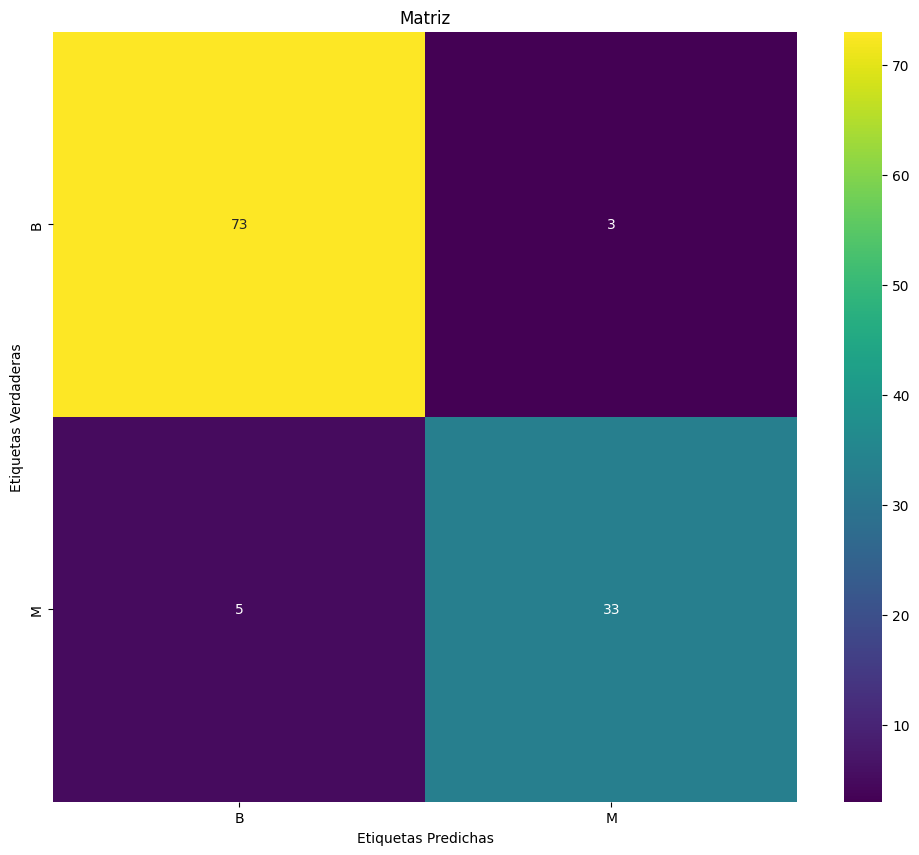

In [64]:
#Visualización
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Matriz')
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.show()

In [65]:
# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')

Precisión del modelo: 92.98%


In [66]:
# Con el algoritmo xgboots cancer_data_AD
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [67]:
X = cancer_data_AD.drop("Diagnosis", axis=1)
y = cancer_data_AD["Diagnosis"]

In [68]:
#Dividimos el dataset en test y training
A_train, A_test, b_train, b_test = train_test_split(X, y, test_size=0.20)

In [69]:
# Crear el modelo de árbol de decisión
tree_classifier = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
tree_classifier.fit(A_train, b_train)

DecisionTreeClassifier(random_state=42)

In [70]:
# Realizar predicciones en el conjunto de prueba
b_pred = tree_classifier.predict(A_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(b_test, b_pred)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')

Precisión del modelo: 94.74%


In [71]:
conf_matrix = confusion_matrix(b_test, b_pred)

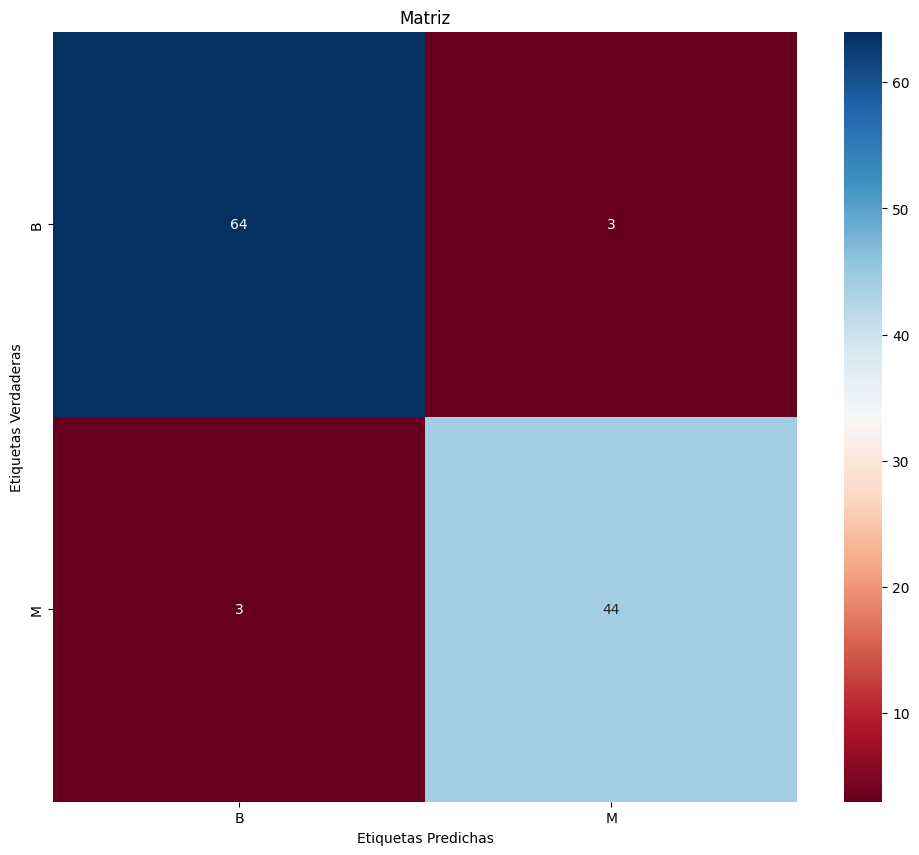

In [72]:
#Visualización
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='RdBu', xticklabels=np.unique(b_test), yticklabels=np.unique(b_test))
plt.title('Matriz')
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.show()